In [16]:
import numpy as np
import os
import scipy, math
import scipy.special
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib
import matplotlib.pyplot as plt

In [7]:
digits = datasets.load_digits()

X, y = digits["data"], digits["target"]


# perform a split 80:20 for train:test ratio, with a single split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.get_n_splits(X, y)    

# obtain the indices for the train and test for the targets and labels
for train_index, test_index in split.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

TRAIN: 1437 TEST: 360
(1437, 64) (1437,) (360, 64) (360,)


In [45]:
# Applying Adaboost technique to the digits dataset

# increased depth and learning rate slightly
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=1000,
    algorithm="SAMME.R", learning_rate=0.65, random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.65, n_estimators=1000, random_state=42)

In [46]:
y_pred = ada_clf.predict(X_test)

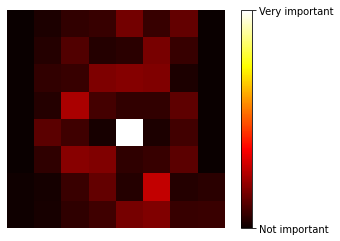

array([0.   , 0.005, 0.011, 0.012, 0.028, 0.012, 0.024, 0.   , 0.   ,
       0.007, 0.019, 0.007, 0.009, 0.03 , 0.012, 0.   , 0.   , 0.011,
       0.012, 0.031, 0.033, 0.032, 0.005, 0.   , 0.   , 0.007, 0.043,
       0.016, 0.011, 0.011, 0.023, 0.   , 0.   , 0.022, 0.014, 0.004,
       0.179, 0.005, 0.015, 0.   , 0.   , 0.01 , 0.034, 0.032, 0.01 ,
       0.012, 0.022, 0.   , 0.002, 0.003, 0.013, 0.024, 0.007, 0.049,
       0.007, 0.009, 0.002, 0.004, 0.01 , 0.014, 0.029, 0.032, 0.012,
       0.013])

In [33]:
# plot digits dataset feature importance chart

def plot_digit(data):
    image = data.reshape(8, 8)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")
    
plot_digit(ada_clf.feature_importances_)

cbar = plt.colorbar(ticks=[ada_clf.feature_importances_.min(), ada_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()
ada_clf.feature_importances_


In [40]:
accuracy_score(y_test, y_pred)

0.9694444444444444

In [43]:
# compare our model against the other models.

from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(max_iter = 10000000000, random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

for clf in (ada_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

AdaBoostClassifier 0.9694444444444444
RandomForestClassifier 0.9611111111111111
SVC 0.9916666666666667
VotingClassifier 0.9861111111111112
